**Inserting Required Modules**

In [1]:
from google.colab import files
import zipfile
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import IPython.display as ipd
import shutil
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

**Insert Dataset from kaggle**

To upload a dataset from Kaggle to Google Colab, a kaggle.json file is first downloaded from Kaggle. This file is then used to upload the dataset to Google Colab.

In [2]:
files.upload()  # Upload the kaggle.json file
# Create the .kaggle directory
os.makedirs('/root/.kaggle', exist_ok=True)

# Move kaggle.json into the .kaggle directory
!mv kaggle.json /root/.kaggle/

# Set permissions to access the API key
!chmod 600 /root/.kaggle/kaggle.json
#download dataset
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio
with zipfile.ZipFile('ravdess-emotional-speech-audio.zip', 'r') as zip_ref:
    zip_ref.extractall('ravdess_data')  # Extract to a folder named 'ravdess_data'

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
License(s): CC-BY-NC-SA-4.0
 97% 417M/429M [00:05<00:00, 26.8MB/s]
100% 429M/429M [00:05<00:00, 84.8MB/s]


In [3]:
ravdess = "ravdess_data/audio_speech_actors_01-24"
ravdess_directory_list = os.listdir(ravdess)
ravdess_directory_list.sort()
print(ravdess_directory_list)
print(len(ravdess_directory_list))

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']
24


# **Segmentation and Silent File Removal**

install and insert required packages

In [4]:
!pip install pydub
!apt-get install ffmpeg
!apt-get install ffmpeg -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [5]:
# Insert required Modules
from pydub import AudioSegment
from pydub.silence import detect_nonsilent

In [6]:
# Base directory containing all audio files
base_dir = "ravdess_data/audio_speech_actors_01-24"

# Output directory to save processed segments
output_dir = "RAVDESS_Segmented"
os.makedirs(output_dir, exist_ok=True)

# Segment length in milliseconds
segment_length = 270

# Counters for segments
total_saved_segments = 0  # Count of saved (non-silent) segments
total_skipped_segments = 0  # Count of skipped (silent) segments

# Iterate through all files and subdirectories in the base directory
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith(".wav"):  # Process only WAV files
            file_path = os.path.join(root, file)

            # Load the audio file
            audio = AudioSegment.from_wav(file_path)

            # Split the audio into chunks
            for i, start in enumerate(range(0, len(audio), segment_length)):
                end = start + segment_length
                segment = audio[start:end]

                # Detect non-silent parts in the segment
                non_silent_parts = detect_nonsilent(segment, min_silence_len=100, silence_thresh=-50)

                # Save non-silent segment
                if non_silent_parts and len(segment) >= 250:
                    total_saved_segments += 1  # Increment saved segment counter

                    # Create a unique output path for each file and segment
                    file_name = os.path.splitext(file)[0]
                    segment_name = f"{file_name}_segment_{i + 1}.wav"  # Customized segment name

                    output_path = os.path.join(output_dir, segment_name)
                    segment.export(output_path, format="wav")
                    print(f"Saved: {output_path}")
                else:
                    total_skipped_segments += 1  # Increment skipped segment counter

# Summary of processing
print("\nProcessing complete.")
print(f"Total segments processed: {total_saved_segments + total_skipped_segments}")
print(f"Total saved (non-silent) segments: {total_saved_segments}")
print(f"Total skipped (silent) segments: {total_skipped_segments}")

Streaming output truncated to the last 5000 lines.
Saved: RAVDESS_Segmented/03-01-06-01-02-02-02_segment_9.wav
Saved: RAVDESS_Segmented/03-01-06-01-02-02-02_segment_10.wav
Saved: RAVDESS_Segmented/03-01-04-01-02-02-02_segment_4.wav
Saved: RAVDESS_Segmented/03-01-04-01-02-02-02_segment_5.wav
Saved: RAVDESS_Segmented/03-01-04-01-02-02-02_segment_6.wav
Saved: RAVDESS_Segmented/03-01-04-01-02-02-02_segment_7.wav
Saved: RAVDESS_Segmented/03-01-04-01-02-02-02_segment_8.wav
Saved: RAVDESS_Segmented/03-01-07-01-01-02-02_segment_5.wav
Saved: RAVDESS_Segmented/03-01-07-01-01-02-02_segment_6.wav
Saved: RAVDESS_Segmented/03-01-07-01-01-02-02_segment_7.wav
Saved: RAVDESS_Segmented/03-01-07-01-01-02-02_segment_8.wav
Saved: RAVDESS_Segmented/03-01-07-01-01-02-02_segment_9.wav
Saved: RAVDESS_Segmented/03-01-07-01-01-02-02_segment_10.wav
Saved: RAVDESS_Segmented/03-01-08-01-01-02-02_segment_4.wav
Saved: RAVDESS_Segmented/03-01-08-01-01-02-02_segment_5.wav
Saved: RAVDESS_Segmented/03-01-08-01-01-02-02_s

In [7]:
# Mapping dictionaries for decoding the file naming conventions
modality_map ={'01':'full-AV', '02':'video-only', '03':'audio-only'}
vocal_channel_map ={'01':'speech', '02':'song'}
emotion_map = {
    '01': 'Neutral',
    '02': 'Calm',
    '03': 'Happy',
    '04': 'Sad',
    '05': 'Angry',
    '06': 'Fearful',
    '07': 'Disgust',
    '08': 'Surprise'
}
emotional_intensity_map ={'01':'normal', '02':'strong'}
statement_map = {'01':'Kids', '02':'Dogs'}
repetition_map = {'01':'1st repetition', '02':'2nd repetition'}
# Initialize lists to store extracted information for each file
file_paths = []
modalities  = []
channel = []
emotions = []
intensity = []
statement = []
repitation_number = []
actor_ids = []
segment_ids = []

# Walk through the output directory to process each file to extract info
for root, dirs, file_names in os.walk(output_dir):
  for file_name in file_names:
    file_path = os.path.join(root, file_name)

    modality_code = file_name.split('-')[0]
    modality =  modality_map.get(modality_code, 'Unknown')

    channel_code = file_name.split('-')[1]
    channel_no = vocal_channel_map.get(channel_code, 'Unknown')

    emotion_code = file_name.split('-')[2]
    emotion = emotion_map.get(emotion_code, 'Unknown')

    emotional_intensity_code = file_name.split('-')[3]
    emotional_intensity = emotional_intensity_map.get(emotional_intensity_code, 'Unknown')

    statement_code = file_name.split('-')[3]
    statement_no = statement_map.get(statement_code, 'Unknown')

    repetition_code = file_name.split('-')[3]
    repitation = repetition_map.get(repetition_code, 'Unknown')

    actor_id = file_name.split('-')[-1].split('_')[0].split('.')[0]
    segment_id = file_name.split('-')[-1].split('_')[-1].split('.')[0]

    # Append the extracted data to corresponding lists
    file_paths.append(file_path)
    emotions.append(emotion)
    actor_ids.append(actor_id)
    modalities.append(modality)
    channel.append(channel_no)
    intensity.append(emotional_intensity)
    statement.append(statement_no)
    repitation_number.append(repitation)
    segment_ids.append(segment_id)
print('Dataset is loaded.')


Dataset is loaded.


**  Create the DataFrame**

In [8]:
df = pd.DataFrame({
    'File_path': file_paths,
    'Emotion': emotions,
    'Actor_id': actor_ids,
    'Statement': statement,
    'Repitation':repitation_number,
    'Channel': channel,
    'Modality': modalities,
    'Intensity': intensity,
    'Segment_number': segment_ids,

})

# Display the first few rows of the DataFrame
pd.set_option('display.max_colwidth', 1)
print(df.head())

                                               File_path   Emotion Actor_id  \
0  RAVDESS_Segmented/03-01-04-02-01-02-12_segment_6.wav   Sad       12        
1  RAVDESS_Segmented/03-01-08-01-02-01-06_segment_9.wav   Surprise  06        
2  RAVDESS_Segmented/03-01-04-02-02-01-19_segment_9.wav   Sad       19        
3  RAVDESS_Segmented/03-01-03-01-02-02-07_segment_8.wav   Happy     07        
4  RAVDESS_Segmented/03-01-06-02-02-02-19_segment_14.wav  Fearful   19        

  Statement      Repitation Channel    Modality Intensity Segment_number  
0  Dogs      2nd repetition  speech  audio-only  strong    6              
1  Kids      1st repetition  speech  audio-only  normal    9              
2  Dogs      2nd repetition  speech  audio-only  strong    9              
3  Kids      1st repetition  speech  audio-only  normal    8              
4  Dogs      2nd repetition  speech  audio-only  strong    14             


In [9]:
df['Emotion'].value_counts()

,count
Emotion,
Angry,1507
Disgust,1435
Happy,1340
Fearful,1325
Surprise,1218
Sad,1186
Calm,1025
Neutral,544


<Axes: xlabel='count', ylabel='Emotion'>

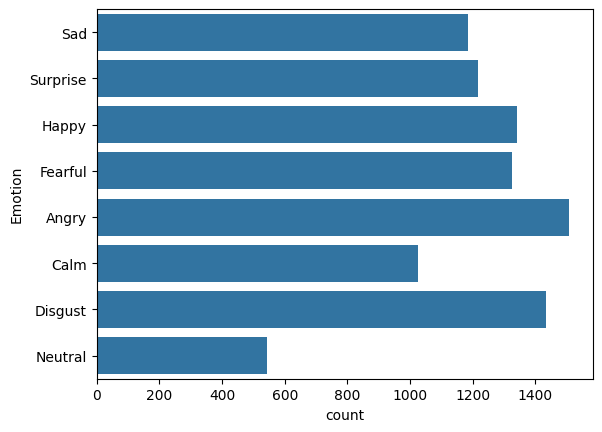

In [10]:
sns.countplot(df['Emotion'])

**Balance the Datafarme**

In [11]:
from sklearn.utils import resample

# Separate majority and minority classes
dfs = [df[df.Emotion == emotion] for emotion in df['Emotion'].unique()]

# Resample minority classes to match the largest class
max_count = max(len(d) for d in dfs)
balanced_dfs = [resample(d, replace=True, n_samples=max_count, random_state=42) if len(d) < max_count else d for d in dfs]

# Combine all classes
balanced_df = pd.concat(balanced_dfs)

print(balanced_df['Emotion'].value_counts())

Emotion
Sad         1507
Surprise    1507
Happy       1507
Fearful     1507
Angry       1507
Calm        1507
Disgust     1507
Neutral     1507
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Emotion'>

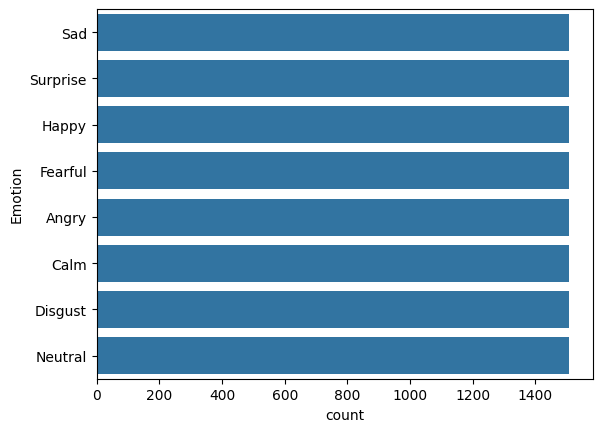

In [12]:
sns.countplot(balanced_df['Emotion'])

In [13]:
# Save DataFrame to CSV for further use
balanced_df.to_csv('ravdess_segments_with_emotions.csv', index=False)

**MFCC extraction and Normalization**

In [14]:
# Initialize lists to store data
mfcc_features = []
file_paths = []

# Load the DataFrame
df = pd.read_csv('ravdess_segments_with_emotions.csv')

# Function to extract MFCC features
def extract_mfcc(file_path, n_mfcc=40, sr=22050):
    # Load the audio file using librosa
    y, sr = librosa.load(file_path, sr=sr)

    # Extract MFCC features
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

    # Transpose MFCC to make it a 1D vector (each segment has multiple frames)
    mfcc = np.mean(mfcc, axis=1)  # Mean across time frames

    return mfcc

# Extract MFCC features for each file
for index, row in df.iterrows():
    file_path = row['File_path']

    # Extract MFCC features for the file
    mfcc = extract_mfcc(file_path)

    # Append the features and file path to the lists
    mfcc_features.append(mfcc)
    file_paths.append(file_path)

# Convert the list of MFCC features to a numpy array
mfcc_array = np.array(mfcc_features)

# Normalize the MFCC features using Z-score normalization
scaler = StandardScaler()
mfcc_normalized = scaler.fit_transform(mfcc_array)

# Add the normalized MFCC features to the DataFrame
df_mfcc = pd.DataFrame(mfcc_normalized, columns=[f'MFCC_{i+1}' for i in range(mfcc_normalized.shape[1])])

# Concatenate the original DataFrame with the MFCC features DataFrame
df_combined = pd.concat([df, df_mfcc], axis=1)

# Display the DataFrame with MFCC features
print(df_combined.head())

# save the combined DataFrame to a CSV file
df_combined.to_csv('ravdess_mfcc_features.csv', index=False)

                                               File_path Emotion  Actor_id  \
0  RAVDESS_Segmented/03-01-04-02-01-01-17_segment_8.wav   Sad     17         
1  RAVDESS_Segmented/03-01-04-02-01-02-08_segment_10.wav  Sad     8          
2  RAVDESS_Segmented/03-01-04-01-01-01-13_segment_10.wav  Sad     13         
3  RAVDESS_Segmented/03-01-04-02-02-01-06_segment_10.wav  Sad     6          
4  RAVDESS_Segmented/03-01-04-01-02-02-21_segment_8.wav   Sad     21         

  Statement      Repitation Channel    Modality Intensity  Segment_number  \
0  Dogs      2nd repetition  speech  audio-only  strong    8                
1  Dogs      2nd repetition  speech  audio-only  strong    10               
2  Kids      1st repetition  speech  audio-only  normal    10               
3  Dogs      2nd repetition  speech  audio-only  strong    10               
4  Kids      1st repetition  speech  audio-only  normal    8                

     MFCC_1  ...   MFCC_31   MFCC_32   MFCC_33   MFCC_34   MFCC_35  

**Creating train and test data**

In [15]:

# TRAIN TEST SPLIT DATA
from sklearn.model_selection import train_test_split
df_combined = pd.read_csv('ravdess_mfcc_features.csv')
train,test = train_test_split(df_combined, test_size=0.2, random_state=0,
                               stratify=df_combined[['Emotion']])
#TRAINING SET
X_train = train.iloc[:, 9:] #Considering only the features starts from 9th column
y_train = train.iloc[:,1] #Considering emotions as labels
print(X_train.shape)
print(X_train)
print(y_train.shape)
print(y_train)

#TESTING SET
X_test = test.iloc[:,9:]
y_test = test.iloc[:,1]
print(X_test.shape)
print(X_test)
print(y_test.shape)
print(y_test[1:10])

(9644, 40)
         MFCC_1    MFCC_2    MFCC_3    MFCC_4    MFCC_5    MFCC_6    MFCC_7  \
905   -0.473796  0.477259 -0.216852  0.793777 -0.149923 -0.830201 -0.239167   
8618   0.827488 -0.103777 -0.085944  0.057658 -0.379665  0.369499  0.460449   
8807  -0.672122  0.870574  0.140052  0.418453  0.542237 -0.511968 -0.128693   
6722   0.541925 -0.161044 -0.022996  0.714559  1.355458  0.398759 -1.602369   
10923  0.137726  1.608335  0.024697 -0.068460  1.023376 -0.018216  0.750112   
...         ...       ...       ...       ...       ...       ...       ...   
2540   0.273776 -1.144710  1.353949  0.794304  0.629604  0.320647 -0.777100   
8084  -0.029646 -1.785358  1.508271  0.125108 -0.443869  0.283333 -0.869718   
6718   0.763041 -0.465842  0.107394  0.844634  0.937108 -0.062097 -1.061081   
3458   0.488677  0.592816  0.623600  0.071943 -0.807804  0.344827 -0.502498   
5451   0.823948 -0.375360  1.016777 -0.253153 -0.907312  0.702340  0.722865   

         MFCC_8    MFCC_9   MFCC_10  ...

**ONE-HOT Encoding**

In [16]:
# ONE HOT ENCODE THE TARGET
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

print(y_test[0:10])
#Since,there are 8 different emotions; we get 8 columns.
#The places where 1 is present represents that particular emotion.
print(y_train.shape)
print(y_test.shape)

[[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0.]]
(9644, 8)
(2412, 8)


# **Modeling**

Function to plot result

In [17]:
def plotter(history):
  plt.figure()
  plt.plot(history.history['loss'],label='train loss')
  plt.plot(history.history['val_loss'],label='test loss')
  plt.xlabel('iterations')
  plt.ylabel('losses')
  plt.legend()
  plt.figure()
  plt.plot(history.history['accuracy'],label='train accuracy')
  plt.plot(history.history['val_accuracy'],label='test accuracy')
  plt.xlabel('iterations')
  plt.ylabel('accuracy')
  plt.legend()

Prepraing data for the model

In [18]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)
print(x_traincnn.shape)
print(x_testcnn.shape)

(9644, 40, 1)
(2412, 40, 1)


Build the model

In [19]:
import tensorflow as tf
import keras
from keras import models
from keras import layers, optimizers
model = models.Sequential()

model.add(tf.keras.layers.Conv1D(128, kernel_size=5, activation='relu', input_shape=(X_train.shape[1], 1), padding='same'))
model.add(tf.keras.layers.Conv1D(128, kernel_size=5, activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))  # Use smaller pool size to retain sequence length
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv1D(64, kernel_size=5, activation='relu', padding='same'))
model.add(tf.keras.layers.Conv1D(64, kernel_size=5, activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))  # Use smaller pool size to retain sequence length
model.add(tf.keras.layers.Dropout(0.4))

# model.add(tf.keras.layers.Conv1D(64, 5, padding='same'))
# model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(8, activation='sigmoid'))

# Adjust optimizer for compatibility with newer versions of Keras
opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
history=model.fit(x_traincnn, y_train, batch_size=250, epochs=1000, validation_data=(x_testcnn, y_test))

Epoch 1/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 12s 259ms/step - accuracy: 0.1315 - loss: 2.0825 - val_accuracy: 0.1920 - val_loss: 2.0638
Epoch 2/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 17s 184ms/step - accuracy: 0.1436 - loss: 2.0649 - val_accuracy: 0.2032 - val_loss: 2.0284
Epoch 3/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 13s 242ms/step - accuracy: 0.1935 - loss: 2.0256 - val_accuracy: 0.2342 - val_loss: 1.9675
Epoch 4/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 229ms/step - accuracy: 0.2045 - loss: 1.9890 - val_accuracy: 0.2525 - val_loss: 1.9369
Epoch 5/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 182ms/step - accuracy: 0.2279 - loss: 1.9596 - val_accuracy: 0.2682 - val_loss: 1.9140
Epoch 6/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 12s 227ms/step - accuracy: 0.2355 - loss: 1.9443 - val_accuracy: 0.2682 - val_loss: 1.8937
Epoch 7/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 11s 255ms/step - accuracy: 0.2436 - loss: 1.9288 - val_accuracy: 0.2844 - val_loss: 1.8823
Epoch 8/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 201ms/step - accuracy: 0.2577 - loss: 1.9

In [ ]:
plotter(history)
model.summary()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = model.predict(x_testcnn)

# Get the class labels
y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(y_test, axis=1)

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test_class, y_pred_class))

# Compute overall metrics for the model
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class, average='weighted')
recall = recall_score(y_test_class, y_pred_class, average='weighted')
f1 = f1_score(y_test_class, y_pred_class, average='weighted')

print("\nOverall Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision (Weighted): {precision:.2f}")
print(f"Recall (Weighted): {recall:.2f}")
print(f"F1-Score (Weighted): {f1:.2f}")


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Calculate the confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)

# Normalize the confusion matrix by row (true label) to calculate accuracy per class
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Print the normalized confusion matrix
print("Normalized Confusion Matrix (Accuracy per Class):")
print(cm_normalized)

# Visualize the normalized confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=range(len(np.unique(y_test_class))))
disp.plot(cmap=plt.cm.Blues, values_format=".2f")
plt.title("Normalized Confusion Matrix (Accuracy per Class)")
plt.show()

